In [1]:
import pandas as pd

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json


import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
import collections

In [2]:
column_name = ['name', 'ratings', 'date', 'comment', 'keyword', 'target']
dataframe = pd.read_csv("/home/aiffel-dj57/project/google_expo_sample.csv")
data = dataframe.values.tolist()
df = pd.DataFrame(data, columns=column_name)

In [3]:
df[:10]

,name,ratings,date,comment,keyword,target
0,dm Jung,5,1년 전,평점 점을 믿을 수가 없다세기에서 세기를 지나오며세계 최대의 축제였던 엑스포요즘의 ...,세계엑스포기념품박물관,expo
1,박성균,3,1년 전,맥주축제,세계엑스포기념품박물관,expo
2,Алексе́й,5,2년 전,역대 엑스포 개최도시의 기념품과 희귀한 아이템을 한 곳에서 볼 수 있습니다,세계엑스포기념품박물관,expo
3,Robert Helvie,3,4년 전,번역 제공 남북한에 관한 흥미로운 것들 거기에서 많은 시간을 보내지 않아도됩니다 ...,세계엑스포기념품박물관,expo
4,hyung-jun kjun,1,5년 전,엑스포는 없고 너무 지루했어,세계엑스포기념품박물관,expo
5,Onur Ozsoy,5,1년 전,번역 제공 주말에는 대개 혼잡합니다 야외 콘서트 및 엔터테인먼트 길거리 음식 작은...,엑스포음악분수,expo
6,Julian Joo-Young Lim,5,1년 전,밤에 시간 잘 맞춰가면 낭만적이고 좋음,엑스포음악분수,expo
7,이상호,5,1년 전,년 월일을 마지막으로 종료되었습니다,엑스포음악분수,expo
8,jk rhee,5,1년 전,이젠 역사속으로 사라질 분수 아쉽네요,엑스포음악분수,expo
9,John Yoon,5,2년 전,년 월 일을 마지막으로 공사한대요월쯤 재오픈한다네요,엑스포음악분수,expo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     812 non-null    object
 1   ratings  812 non-null    int64 
 2   date     812 non-null    object
 3   comment  812 non-null    object
 4   keyword  812 non-null    object
 5   target   812 non-null    object
dtypes: int64(1), object(5)
memory usage: 38.2+ KB


In [5]:
top_publishers = df["name"].value_counts().head(30)
top_publishers

#블로그 키워드에 중복이 있는걸까요?한 블로그에서 여러번씩 포스팅을 한건지 아니면 중복으로 크롤링이 된건지는 확인해봐야 알 것 같아요

 Алексе́й           4
 hoony kim          3
 이상건                3
 김종현                2
 문정식                2
 오주현                2
 홍종상                2
 TV봇짐장수             2
 배용기                2
 박세훈                2
 WY Han             2
 Henseg O           2
 김준수                2
 김기철                2
 이영애                2
 한내마음의 심금           2
 정상문                2
 wyggg k            2
 박성균                2
 sandy park         2
 침뽕                 2
 unicoop u          2
 유장운                2
 Jincheul Jang      2
 이흥균                2
 이종호                2
 Yongcheol Choi     2
 Euikyung Lee       2
 배진환                2
 원영걸                2
Name: name, dtype: int64

In [6]:
top_publishers_list = top_publishers.index.tolist()

df_sample = df[df["name"].isin(top_publishers_list)]

In [51]:
def top_n(df, n, main_field, grouping_fields, sumi=False):        
    all_cols = grouping_fields+[main_field]
    titles_df = df.dropna(subset=all_cols)
    titles_df = titles_df[all_cols]
    if sumi:
        titles_df = titles_df.groupby(grouping_fields).sum()
    titles_df = titles_df.sort_values([main_field], ascending=False)
    titles_df.rename(columns={main_field: main_field}, inplace=True)
    return titles_df.head(n)

top_n(df_sample, 50, main_field='name', grouping_fields=['date', 'comment', 'target', 'ratings'])


,date,comment,target,ratings,name
247,1년 전,야경을 즐길 수 있는 곳 입니다,expo,5,침뽕
536,1년 전,야간 개장도 하면 좋을 것 같습니다,expo,5,침뽕
475,1달 전,미디어파사드 좋아요,expo,5,정상문
337,2년 전,대전 최고의 경관조명,expo,5,정상문
372,2년 전,연인들이 한밭수목원 데이트 후 야경사진으로 많이 찍는 포토존입니다 대전 년도 엑스포...,expo,5,전영호
713,1년 전,아이들과 광장에서 놀 수 있어 좋아요,expo,5,전영호
672,1년 전,대전엑스포 기념탑자주 이벤트가 개최되는 곳현재 탑앞 광장은 리모델링 중바로옆 대전컨...,expo,4,이흥균
319,1년 전,견우직녀다리엑스포시민광장과 한빛탑을 연결자농차는 불가,expo,4,이흥균
374,2년 전,자전거 타기도 좋고 휴식장소로 최적임,expo,3,이종호
768,2년 전,인생사진관에포트샾이최고,expo,3,이종호


In [8]:
#Generate document term matrix to find most occuring terms in the reviews
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df['comment'])
text_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#text_dtm.index=textdata.index
text_dtm.head()

,가격도,가격은,가고싶었는데지금가보니,가고싶은,가기에는,가까운,가까이봐서,가끔,가끔가다,가끔식,...,흘렀네요재개발로,흥미로운,희귀한,희망으로,희망은,힐링,힐링공간,힐링하며,힐링했네요,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


https://liveyourit.tistory.com/57
파이썬 한글 명사 빈도수 계산
https://liveyourit.tistory.com/58

```python
def wordcloud(data,title):
  wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
text_dtm=text_dtm.transpose()

for index,product in enumerate(text_dtm.columns):
  wordcloud(text_dtm[product].sort_values(ascending=False),product)
  ```

In [9]:
text = df.comment.values
print(text)

['평점 점을 믿을 수가 없다세기에서 세기를 지나오며세계 최대의 축제였던 엑스포요즘의 우리로 치면 월드컵이나 올림픽의 비즈니스버전이랄까에 대한 다양한 관련 물건들과 그 배경들을 알 수 있다과거의 엑스포는 신기술과 산업의 전시회였고기업들의 경쟁터이자 각종 문화의 산실이였다거기에서부터 이해를 할 수 있다면 엑스포에 대해서 더 재밌지 않을까애장품을 기증 내지는 전시해주셔서 굉장한 기회를 주신 성함은 기억 안나지만 모 교수님께 진심으로 감사드리고 싶다여기서 일하시는 직원분들의 친절한 안내와 설명에도 한번 더 감동 받았다산업사업을 비롯한 비즈니스와 기업 포함과 역사 디자인에 대해 관심이 있는 사람이라면 강력하게 추천한다파리 여행을 할때 일 머물었는데 루브르박물관에 일을 갔었다그만큼 재밌었는데여긴 비록 그 규모에서는 떨어지지만 더 재밌다현재 초대기업으로 존재하고 있는 꽤 많은 기업들과 각종 캐릭터들 그리고 패션 브랜드들 세계적 랜드마크 그리고 초유명 일류 화가 건축가등그들이 엑스포에 영향을 받고 영감을 얻었다는 사실을 기억하시라강력하게 추천한다나는 기회가 되면 또 갈 것 이다단 월요일은 휴무이니 주의'
 '맥주축제' '역대 엑스포 개최도시의 기념품과 희귀한 아이템을 한 곳에서 볼 수 있습니다'
 ' 번역 제공 남북한에 관한 흥미로운 것들 거기에서 많은 시간을 보내지 않아도됩니다 옆집 과학 공원은 한동안 수리를 위해 폐쇄되었습니다  년  월 현재원문                                '
 '엑스포는 없고 너무 지루했어'
 ' 번역 제공 주말에는 대개 혼잡합니다 야외 콘서트 및 엔터테인먼트 길거리 음식 작은 기념품은 지역에서 판매됩니다 조금 더 앞에는 막대가 많은 막대의 거리가 있습니다 이곳은 특히 오후 시 이후 매우 활기찬 곳입니다원문            '
 '밤에 시간 잘 맞춰가면 낭만적이고 좋음' '년 월일을 마지막으로 종료되었습니다' '이젠  역사속으로 사라질 분수 아쉽네요'
 '년 월 일을 마지막으로 공사한대요월쯤 재오픈한다네요' '여름분수 

In [10]:
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

def get_noun(comment):
    okt = Okt()
    noun = okt.nouns(comment)
    for i,v in enumerate(noun):
            if len(v) < 2:
                    noun.pop(i)
                
    count = Counter(noun)
    noun_list = count.most_common(100)
    
    return noun_list

In [11]:
#text = get_noun(text)

In [12]:
from konlpy.tag import Twitter 

In [13]:
twitter = Twitter() 
morphs = [] 

for sentence in text: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

[[('평점', 'NNG'), ('점', 'NNG'), ('을', 'JKO'), ('믿', 'VV'), ('을', 'ETM'), ('수', 'NNB'), ('가', 'JKS'), ('없', 'VA'), ('다', 'EC'), ('세기', 'NNG'), ('에서', 'JKB'), ('세기', 'NNG'), ('를', 'JKO'), ('지나오', 'VV'), ('며', 'EC'), ('세계', 'NNG'), ('최대', 'NNG'), ('의', 'JKG'), ('축제', 'NNG'), ('였', 'VCP+EP'), ('던', 'ETM'), ('엑스포', 'NNG'), ('요즘', 'NNG'), ('의', 'JKG'), ('우리', 'NP'), ('로', 'JKB'), ('치', 'VV'), ('면', 'EC'), ('월드컵', 'NNG'), ('이나', 'JC'), ('올림픽', 'NNP'), ('의', 'JKG'), ('비즈니스', 'NNG'), ('버전', 'NNG'), ('이', 'VCP'), ('랄까', 'EC'), ('에', 'JKB'), ('대한', 'VV+ETM'), ('다양', 'XR'), ('한', 'XSA+ETM'), ('관련', 'NNG'), ('물건', 'NNG'), ('들', 'XSN'), ('과', 'JC'), ('그', 'MM'), ('배경', 'NNG'), ('들', 'XSN'), ('을', 'JKO'), ('알', 'VV+ETM'), ('수', 'NNB'), ('있', 'VV'), ('다', 'EC'), ('과거', 'NNG'), ('의', 'JKG'), ('엑스포', 'NNG'), ('는', 'JX'), ('신', 'XPN'), ('기술', 'NNG'), ('과', 'JC'), ('산업', 'NNG'), ('의', 'JKG'), ('전시회', 'NNG'), ('였', 'VCP+EP'), ('고', 'EC'), ('기업', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('경쟁', 'NNG'), ('터', 'NNB'

In [37]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word)and("대전"not in word)and("곳"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['평점', '점', '세기', '세기', '세계', '최대', '축제', '엑스포', '요즘', '우리', '치면', '월드컵', '올림픽', '비즈니스', '버전', '랄', '대한', '관련', '물건', '그', '배경', '알', '과거', '엑스포', '기술', '산업', '전시회', '기업', '경쟁', '터', '이자', '각종', '문화', '거기', '이해', '엑스포', '대해', '더', '애', '품', '기증', '전시', '기회', '주신', '성함', '기억', '모', '진심', '감사', '여기', '일', '직원', '설명', '한번', '더', '감동', '산업', '사업', '비롯', '비즈니스', '기업', '포함', '역사', '디자인', '대해', '관심', '사람', '라면', '추천', '파리', '여행', '때', '일', '루브르', '박물관', '일', '다그', '비록', '그', '규모', '더', '현재', '초대', '기업', '존재', '꽤', '기업', '각종', '캐릭터', '패션', '브랜드', '세계', '랜드마크', '초유', '일류', '화가', '건축가', '등그', '엑스포', '영향', '영감', '사실', '기억', '추천', '기회', '또', '다단', '월요일', '휴무', '주의', '맥주', '축제', '역대', '엑스포', '개최', '도시', '기념품', '희귀', '아이템', '볼', '번역', '제공', '남북한', '관', '거기', '시간', '옆집', '과학', '공원', '위해', '폐쇄', '년', '월', '현재', '원문', '엑스포', '번역', '제공', '대개', '야외', '콘서트', '및', '엔터테인먼트', '길거리', '음식', '기념품', '지역', '판매', '조금', '더', '앞', '막대', '막대', '거리', '오후', '시', '이후', '매우', '원문', '밤', '시간', '낭만', '년', '월일', '마지막', '종료'

In [39]:
noun_adj_adv_list2=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수" not in word) and("게" not in word)and("말" not in word)and("대전" not in word)and("곳" not in word): 
            noun_adj_adv_list2.append(word) 

print(noun_adj_adv_list2)

['평점', '점', '세기', '세기', '세계', '최대', '축제', '엑스포', '요즘', '우리', '치면', '월드컵', '올림픽', '비즈니스', '버전', '랄', '대한', '관련', '물건', '그', '배경', '알', '과거', '엑스포', '기술', '산업', '전시회', '기업', '경쟁', '터', '이자', '각종', '문화', '거기', '이해', '엑스포', '대해', '더', '애', '품', '기증', '전시', '기회', '주신', '성함', '기억', '모', '진심', '감사', '여기', '일', '직원', '설명', '한번', '더', '감동', '산업', '사업', '비롯', '비즈니스', '기업', '포함', '역사', '디자인', '대해', '관심', '사람', '라면', '추천', '파리', '여행', '때', '일', '루브르', '박물관', '일', '다그', '비록', '그', '규모', '더', '현재', '초대', '기업', '존재', '꽤', '기업', '각종', '캐릭터', '패션', '브랜드', '세계', '랜드마크', '초유', '일류', '화가', '건축가', '등그', '엑스포', '영향', '영감', '사실', '기억', '추천', '기회', '또', '다단', '월요일', '휴무', '주의', '맥주', '축제', '역대', '엑스포', '개최', '도시', '기념품', '희귀', '아이템', '볼', '번역', '제공', '남북한', '관', '거기', '시간', '옆집', '과학', '공원', '위해', '폐쇄', '년', '월', '현재', '원문', '엑스포', '번역', '제공', '대개', '야외', '콘서트', '및', '엔터테인먼트', '길거리', '음식', '기념품', '지역', '판매', '조금', '더', '앞', '막대', '막대', '거리', '오후', '시', '이후', '매우', '원문', '밤', '시간', '낭만', '년', '월일', '마지막', '종료'

In [35]:
count = Counter(noun_adj_adv_list)

In [36]:
words = dict(count.most_common())

In [37]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords


In [38]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='KoPubDotumBold')

In [39]:
wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


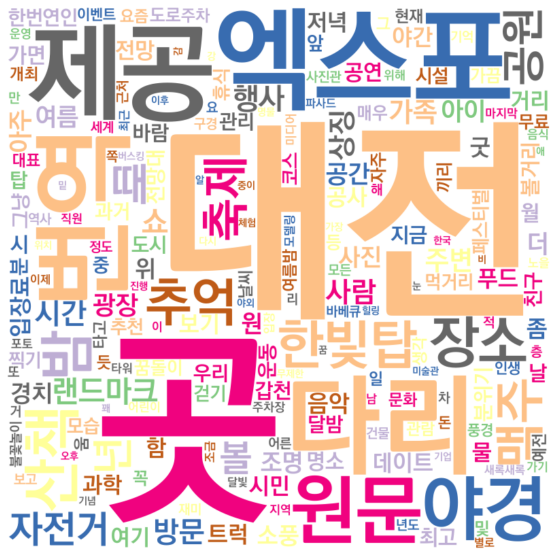

In [41]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('google_expo.png')


In [ ]:
#워드 클라우드를 만들어봤는데 '곳'과 '대전'이라는 키워드를 제거하고 봐야할까요. 

In [40]:
count2 = Counter(noun_adj_adv_list2)

words2 = dict(count2.most_common())

In [41]:
wordcloud2 = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words2)

<class 'numpy.ndarray'>
(800, 800, 3)


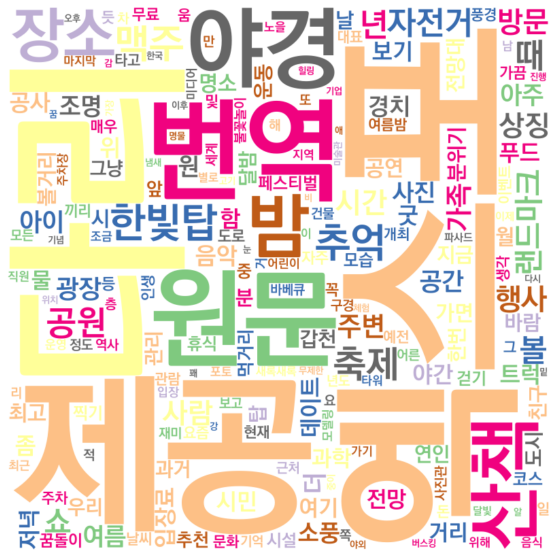

In [42]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('google_expo2.png')


# 생각보다 필요 없는 단어가 많은 것 같다
대전, 곳, 엑스포, 다리, 번역, 제공, 원문 등

In [43]:
noun_adj_adv_list3=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수" not in word) and("게" not in word)and("말" not in word)and("대전" not in word)and("곳" not in word)and("엑스포" not in word)and("다리" not in word)and("번역" not in word)and("제공" not in word)and("원문" not in word): 
            noun_adj_adv_list3.append(word) 

print(noun_adj_adv_list3)

['평점', '점', '세기', '세기', '세계', '최대', '축제', '요즘', '우리', '치면', '월드컵', '올림픽', '비즈니스', '버전', '랄', '대한', '관련', '물건', '그', '배경', '알', '과거', '기술', '산업', '전시회', '기업', '경쟁', '터', '이자', '각종', '문화', '거기', '이해', '대해', '더', '애', '품', '기증', '전시', '기회', '주신', '성함', '기억', '모', '진심', '감사', '여기', '일', '직원', '설명', '한번', '더', '감동', '산업', '사업', '비롯', '비즈니스', '기업', '포함', '역사', '디자인', '대해', '관심', '사람', '라면', '추천', '파리', '여행', '때', '일', '루브르', '박물관', '일', '다그', '비록', '그', '규모', '더', '현재', '초대', '기업', '존재', '꽤', '기업', '각종', '캐릭터', '패션', '브랜드', '세계', '랜드마크', '초유', '일류', '화가', '건축가', '등그', '영향', '영감', '사실', '기억', '추천', '기회', '또', '다단', '월요일', '휴무', '주의', '맥주', '축제', '역대', '개최', '도시', '기념품', '희귀', '아이템', '볼', '남북한', '관', '거기', '시간', '옆집', '과학', '공원', '위해', '폐쇄', '년', '월', '현재', '대개', '야외', '콘서트', '및', '엔터테인먼트', '길거리', '음식', '기념품', '지역', '판매', '조금', '더', '앞', '막대', '막대', '거리', '오후', '시', '이후', '매우', '밤', '시간', '낭만', '년', '월일', '마지막', '종료', '젠', '역사', '속', '년', '월', '일', '마지막', '월', '재', '오픈', '여름', '한번', '푸드', '트럭'

In [44]:
count3 = Counter(noun_adj_adv_list3)
words3 = dict(count3.most_common())

wordcloud3 = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    
    background_color='white',                             
    colormap = 'Accent_r',                                
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words3)

<class 'numpy.ndarray'>
(800, 800, 3)


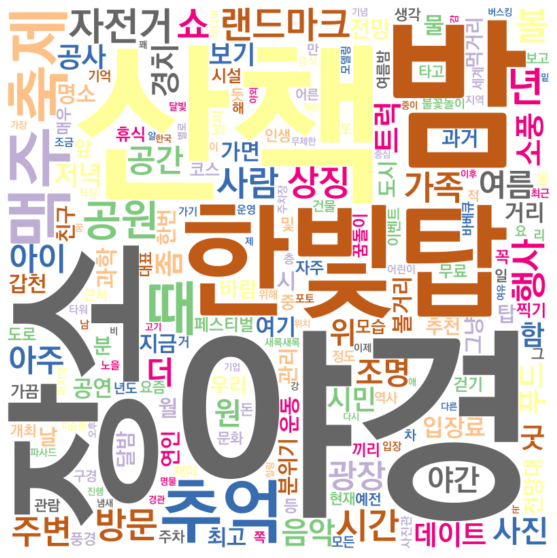

In [47]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('google_expo3.png')


# 워드 클라우드 결과
- 야경
- 밤
- 산책
- 추억
- 자전거
- 맥주
- 한빛탑
- 축제
- 공원
- 랜드마크

밤에 야경을 보러 산책을 하러 많이 가나봐요. 그리고 맥주 생각도 많이 하나봐

In [53]:
from textblob import TextBlob

In [54]:
TextBlob('cool just like this').sentiment.polarity

0.35

In [56]:
test = TextBlob("The movie was awesome!")
print(test.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)


In [55]:
TextBlob('행복해요').sentiment.polarity

0.0

In [65]:
df['comment'] = df['comment'].map(str) #이렇게하면 comment의 dtype이 string으로 변경되어야 하는데 왜 안될까요 ㅠㅠ
#string으로 변경해야 아래 코드를 실행할 수 있다..........

In [69]:
type(df['comment'][0])

str

In [67]:
night_view = df['comment'].str.contains('야경')
print(night_view)

0      False
1      False
2      False
3      False
4      False
       ...  
807    False
808    False
809    False
810    False
811    False
Name: comment, Length: 812, dtype: bool


In [65]:
conditions = [
        (df['comment'].str.contains('야경'),
        (df['comment'].str.contains('밤'),
        (df['comment'].str.contains('산책'), 
        (df['comment'].str.contains('한빛탑'),  
        (df['comment'].str.contains('맥주')
         ]
         

df['comment']=np.select(conditions, default='others')

SyntaxError: invalid syntax (<ipython-input-65-2f3b14ad8ebd>, line 7)